In [1]:
#import libraries
import pandas as pd


In [2]:
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns

In [15]:
import datetime as dt

In [4]:
#load data
df = pd.read_excel(r"C:\Users\taman\Downloads\FH_Cohort_2023_02_28.xlsx")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date1       4218 non-null   object 
 1   orgId       4218 non-null   int64  
 2   GMV         4218 non-null   float64
 3   Month_Year  4218 non-null   object 
 4   Org_ID      4218 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 164.9+ KB


In [6]:
#take a look at the head
df.head()

,date1,orgId,GMV,Month_Year,Org_ID
0,2021-1,57108,239754.939224,2021-1,57108
1,2021-1,63082,265837.326693,2021-1,63082
2,2021-1,77065,146774.254333,2021-1,77065
3,2021-10,1971,102402.630000,2021-1,1971
4,2021-10,3701,158000.000000,2021-7,3701


In [7]:
#drop rows with no idLead_Details
df = df.dropna(subset=['Org_ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 4217
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date1       4218 non-null   object 
 1   orgId       4218 non-null   int64  
 2   GMV         4218 non-null   float64
 3   Month_Year  4218 non-null   object 
 4   Org_ID      4218 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 197.7+ KB


In [12]:
#create a coloumn index with the min Lead_date aka first time customer was accquired
df['Cohort Month'] = df.groupby('Org_ID')['date1'].transform('min')
df.head(10)



,date1,orgId,GMV,Month_Year,Org_ID,Cohort Month
0,2021-1,57108,2.397549e+05,2021-1,57108,2021-1
1,2021-1,63082,2.658373e+05,2021-1,63082,2021-1
2,2021-1,77065,1.467743e+05,2021-1,77065,2021-1
3,2021-10,1971,1.024026e+05,2021-1,1971,2021-10
4,2021-10,3701,1.580000e+05,2021-7,3701,2021-10
5,2021-10,4284,1.173029e+05,2021-6,4284,2021-10
6,2021-10,4707,1.691519e+05,2021-5,4707,2021-10
7,2021-10,5382,1.326000e+05,2021-6,5382,2021-10
8,2021-10,5553,1.001600e+07,2021-4,5553,2021-10
9,2021-10,5599,3.807140e+05,2021-6,5599,2021-10


In [13]:
df['date1'] = pd.to_datetime(df['date1'])
df['Month_Year'] = pd.to_datetime(df['Month_Year'])
df['Cohort Month'] = pd.to_datetime(df['Cohort Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 4217
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date1         4218 non-null   datetime64[ns]
 1   orgId         4218 non-null   int64         
 2   GMV           4218 non-null   float64       
 3   Month_Year    4218 non-null   datetime64[ns]
 4   Org_ID        4218 non-null   int64         
 5   Cohort Month  4218 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2)
memory usage: 230.7 KB


In [16]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)
df['LeadMonth'] = df['date1'].apply(get_month)

df.head()

,date1,orgId,GMV,Month_Year,Org_ID,Cohort Month,LeadMonth
0,2021-01-01,57108,239754.939224,2021-01-01,57108,2021-01-01,2021-01-01
1,2021-01-01,63082,265837.326693,2021-01-01,63082,2021-01-01,2021-01-01
2,2021-01-01,77065,146774.254333,2021-01-01,77065,2021-01-01,2021-01-01
3,2021-10-01,1971,102402.630000,2021-01-01,1971,2021-10-01,2021-10-01
4,2021-10-01,3701,158000.000000,2021-07-01,3701,2021-10-01,2021-10-01


In [17]:
#create a date element function to get a series for substraction
#import datetime as dt
def get_data_elements(dataframe,column):
    day = dataframe[column].dt.day
    month = dataframe[column].dt.month
    year = dataframe[column].dt.year
    return day, month, year

In [98]:
#get data elements for our cohort and lead columns
#_,Lead_month,Lead_year = get_data_elements(df,'Lead_Date')
#_,Cohort_month,Cohort_year = get_data_elements(df,'Cohort Month')
#def get_data_elements(dataframe,column):
    #dataframe[["day", "month", "year"]] = dataframe["LeadMonth"].str.split("-", expand = True)
    


In [18]:
_,Lead_Month,Lead_year = get_data_elements(df,'LeadMonth')
_,Cohort_Month,Cohort_year = get_data_elements(df,'Cohort Month')


In [19]:
Cohort_Month[:10]

0     1
1     1
2     1
3    10
4    10
5    10
6    10
7    10
8    10
9    10
Name: Cohort Month, dtype: int64

In [20]:
Lead_Month[:10]

0     1
1     1
2     1
3    10
4    10
5    10
6    10
7    10
8    10
9    10
Name: LeadMonth, dtype: int64

In [21]:
df.head()

,date1,orgId,GMV,Month_Year,Org_ID,Cohort Month,LeadMonth
0,2021-01-01,57108,239754.939224,2021-01-01,57108,2021-01-01,2021-01-01
1,2021-01-01,63082,265837.326693,2021-01-01,63082,2021-01-01,2021-01-01
2,2021-01-01,77065,146774.254333,2021-01-01,77065,2021-01-01,2021-01-01
3,2021-10-01,1971,102402.630000,2021-01-01,1971,2021-10-01,2021-10-01
4,2021-10-01,3701,158000.000000,2021-07-01,3701,2021-10-01,2021-10-01


In [22]:
#create a cohort index
year_diff = Lead_year -Cohort_year
month_diff = Lead_Month -Cohort_Month
df['CohortIndex'] = year_diff*12+month_diff+1
df.tail()

,date1,orgId,GMV,Month_Year,Org_ID,Cohort Month,LeadMonth,CohortIndex
4213,2023-02-01,487982,102624.250023,2023-01-01,487982,2023-01-01,2023-02-01,2
4214,2023-02-01,489993,399697.899987,2023-01-01,489993,2023-02-01,2023-02-01,1
4215,2023-02-01,490835,383730.000000,2023-02-01,490835,2023-02-01,2023-02-01,1
4216,2023-02-01,491916,190854.910019,2023-01-01,491916,2023-02-01,2023-02-01,1
4217,2023-02-01,492626,120004.000000,2023-02-01,492626,2023-02-01,2023-02-01,1


In [23]:
#count the ID 
cohort_data = df.groupby(['Month_Year','date1'])['GMV'].apply(pd.Series.nunique).reset_index()
cohort_data

,Month_Year,date1,GMV
0,2021-01-01,2021-01-01,3
1,2021-01-01,2021-02-01,10
2,2021-01-01,2021-03-01,7
3,2021-01-01,2021-04-01,6
4,2021-01-01,2021-05-01,6
...,...,...,...
346,2022-12-01,2023-01-01,20
347,2022-12-01,2023-02-01,12
348,2023-01-01,2023-01-01,9
349,2023-01-01,2023-02-01,17


In [25]:
#create pivot table
cohort_table = cohort_data.pivot(index='Month_Year', columns='date1',values='GMV')

In [26]:
cohort_table

date1,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
Month_Year,,,,,,,,,,,,,,,,,,,,,
2021-01-01,3.0,10.0,7.0,6.0,6.0,7.0,12.0,15.0,15.0,13.0,...,18.0,19.0,16.0,15.0,14.0,10.0,11.0,19.0,18.0,15.0
2021-02-01,NaN,1.0,6.0,1.0,3.0,2.0,5.0,6.0,8.0,5.0,...,10.0,8.0,8.0,10.0,8.0,10.0,12.0,8.0,8.0,6.0
2021-03-01,NaN,NaN,2.0,3.0,8.0,10.0,5.0,6.0,7.0,9.0,...,16.0,18.0,12.0,15.0,14.0,13.0,9.0,12.0,15.0,11.0
2021-04-01,NaN,NaN,NaN,5.0,15.0,14.0,9.0,14.0,15.0,13.0,...,22.0,22.0,22.0,24.0,21.0,17.0,19.0,19.0,18.0,17.0
2021-05-01,NaN,NaN,NaN,NaN,5.0,16.0,17.0,11.0,12.0,15.0,...,20.0,17.0,16.0,18.0,14.0,16.0,15.0,15.0,21.0,15.0
2021-06-01,NaN,NaN,NaN,NaN,NaN,8.0,9.0,15.0,11.0,10.0,...,19.0,23.0,16.0,19.0,15.0,14.0,13.0,16.0,15.0,14.0
2021-07-01,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,6.0,6.0,...,15.0,20.0,17.0,19.0,19.0,17.0,19.0,17.0,19.0,12.0
2021-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,7.0,...,16.0,14.0,13.0,18.0,15.0,11.0,12.0,11.0,15.0,15.0
2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,...,8.0,8.0,9.0,10.0,10.0,12.0,6.0,7.0,12.0,8.0


<AxesSubplot:xlabel='date1', ylabel='Month_Year'>

<Figure size 1512x720 with 0 Axes>

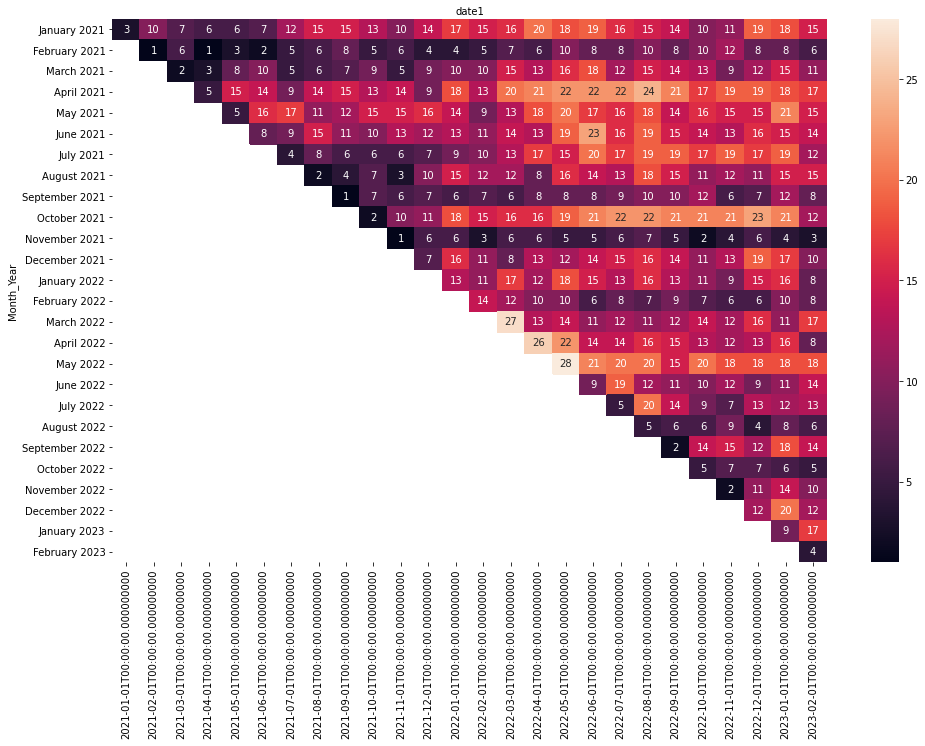

In [47]:
ax=plt.figure(figsize=(21,10))
#cohort_table.index = cohort_table.index.strftime('%B %Y')
fig, ax = plt.subplots(1,1,figsize = (16,10))
ax.set_xlabel('date1')
ax.set_ylabel("Month_Year")
ax.xaxis.set_label_position('top')

sns.heatmap(cohort_table,annot=True,fmt='g')
